<a href="https://colab.research.google.com/github/varunkumarnr/Movie_Recommender/blob/main/TVshow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




** Netflix TV Show and movie visulation and recommendation using Kmeans(Varun Kumar N R)**




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


data base importing


In [ ]:
db = pd.read_csv("/content/drive/MyDrive/databases/netflix_titles.csv")

In [ ]:
db.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   show_id             7787 non-null   object
 1   type                7787 non-null   object
 2   title               7787 non-null   object
 3   director            5398 non-null   object
 4   cast                7069 non-null   object
 5   country             7280 non-null   object
 6   date_added          7777 non-null   object
 7   release_year        7787 non-null   int64 
 8   rating              7780 non-null   object
 9   duration            7787 non-null   object
 10  listed_in           7787 non-null   object
 11  description         7787 non-null   object
 12  Movie_release_type  7761 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [ ]:
netflix_shows = db[db['type']=='TV Show']
netflix_movies = db[db['type']== 'Movie']

Analysis of Movies vs TV shows

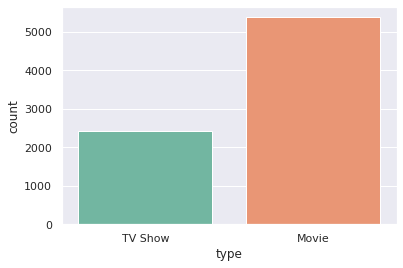

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=db, palette="Set2")

Best month to upload content

In [ ]:
month_order =  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

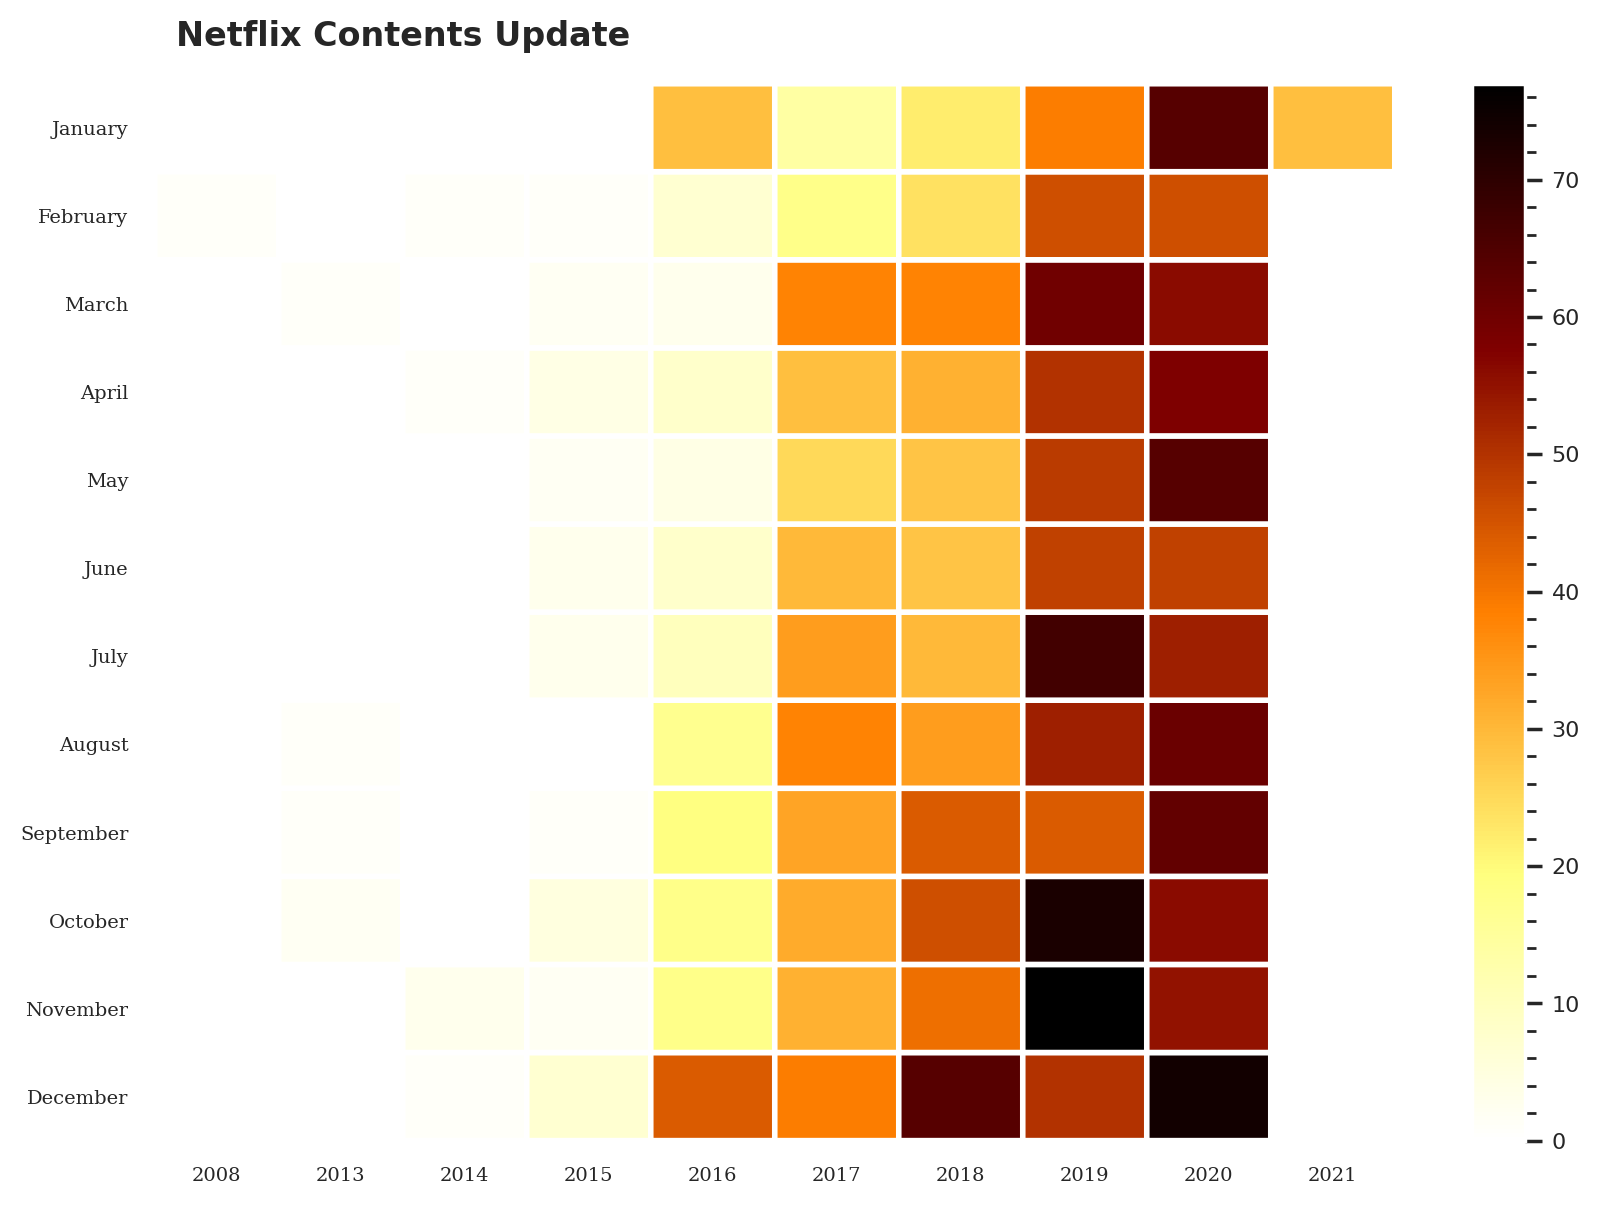

In [ ]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In 2019 Jan and Dec were the months where least content was added. So adding new content this month could bring higher rate of success

number of movies and shows according to rating

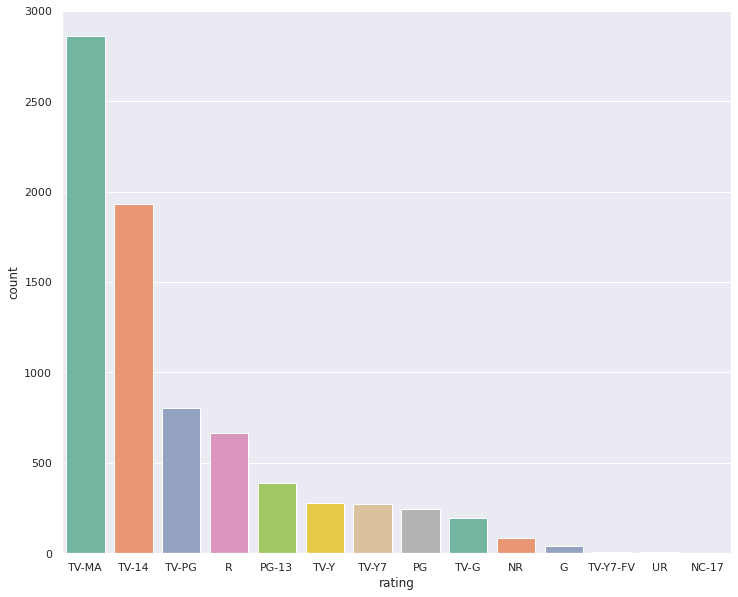

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=db, palette="Set2", order=db['rating'].value_counts().index[0:15])

In [ ]:
imdb_r = pd.read_csv("/content/drive/MyDrive/databases/IMDb ratings.csv")

In [ ]:
imdb_r.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [ ]:
imdb_m = pd.read_csv("/content/drive/MyDrive/databases/IMDb movies.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
imdb_m.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
ratings = pd.DataFrame({'Title':imdb_m.title,
                    'Release Year':imdb_m.year,
                    'Rating': imdb_r.weighted_average_vote,
                    'Genre':imdb_m.genre})

In [ ]:
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape


(85852, 4)

In [ ]:
ratings.dropna()
joint_data=ratings.merge(db,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [ ]:
print((joint_data.sort_values("Rating",ascending=True).tail(10))['title'])

609                           Koshish
2669    Ani... Dr. Kashinath Ghanekar
736                       City of God
227                          Gol Maal
1669           Much Ado About Nothing
1301                        Inception
380                  Schindler's List
398                      Pulp Fiction
1002                         Breakout
991                          Innocent
Name: title, dtype: object


In [ ]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739 entries, 991 to 1690
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         2739 non-null   object 
 1   Release Year  2739 non-null   object 
 2   Rating        2739 non-null   float64
 3   Genre         2739 non-null   object 
 4   show_id       2739 non-null   object 
 5   type          2739 non-null   object 
 6   title         2739 non-null   object 
 7   director      2411 non-null   object 
 8   cast          2678 non-null   object 
 9   country       2693 non-null   object 
 10  date_added    2737 non-null   object 
 11  release_year  2739 non-null   int64  
 12  rating        2738 non-null   object 
 13  duration      2739 non-null   object 
 14  listed_in     2739 non-null   object 
 15  description   2739 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 363.8+ KB


Countries with most content on netflix

In [ ]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


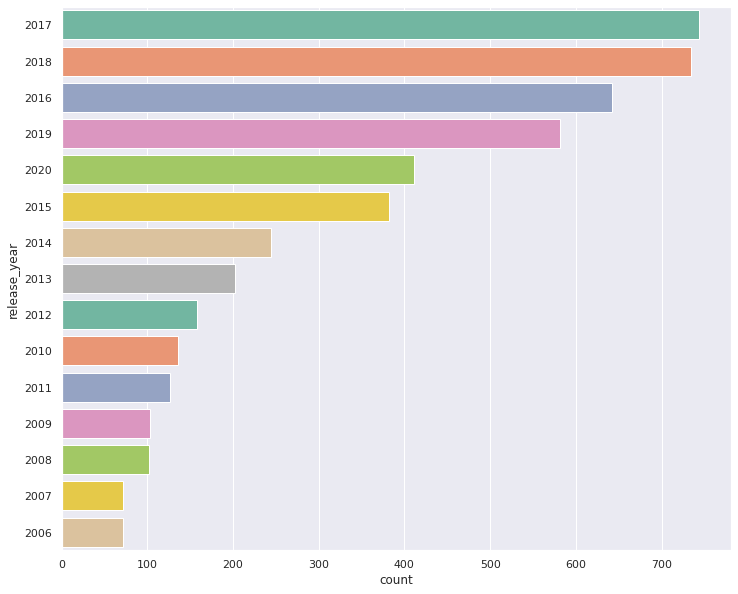

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

In [ ]:
import random
import re

In [ ]:
orig_netflix = db[db["type"] == "Movie"].reset_index()
netflix = db[["title", "listed_in", "description"]].copy()
netflix.head()

,title,listed_in,description
0,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,21,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix.isnull().sum()

title          0
listed_in      0
description    0
dtype: int64

In [ ]:
def preprocessing(desc):
    desc = desc.lower()
    desc = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', desc)
    desc = " ".join(desc.split())
    
    return desc

In [ ]:
netflix["new_description"] = netflix["description"].apply(lambda x: preprocessing(x))
print(netflix.shape)
netflix.head()

(7787, 4)


,title,listed_in,description,new_description
0,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...
1,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,after a devastating earthquake hits mexico cit...
2,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",when an army recruit is found dead his fellow ...
3,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",in a postapocalyptic world rag doll robots hid...
4,21,Dramas,A brilliant group of students become card-coun...,a brilliant group of students become card coun...


In [ ]:
print(netflix["description"].iloc[0])
print(netflix["new_description"].iloc[0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.
in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor


In [ ]:
from gensim.models.fasttext import FastText as FT_gensim

In [ ]:
corpus = netflix["new_description"].tolist()
sentences = [re.split(' ', str(sentence)) for sentence in corpus]
print(corpus[0])
print(sentences[0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor
['in', 'a', 'future', 'where', 'the', 'elite', 'inhabit', 'an', 'island', 'paradise', 'far', 'from', 'the', 'crowded', 'slums', 'you', 'get', 'one', 'chance', 'to', 'join', 'the', '3', 'saved', 'from', 'squalor']


In [ ]:
embedding_size = 30

FT_model = FT_gensim( min_count=2, min_n=2, max_n=5, sg=1, negative=10,
                         sample=0.001, window=5, alpha=0.025, min_alpha=0.0001)

FT_model.build_vocab(sentences)

print('corpus_count: ', FT_model.corpus_count)
print('corpus_total_words: ', FT_model.corpus_total_words)

FT_model.train(sentences,
    epochs=FT_model.epochs,
    total_examples=FT_model.corpus_count, total_words=FT_model.corpus_total_words)

print(FT_model)


corpus_count:  7787
corpus_total_words:  191092
FastText(vocab=9694, size=100, alpha=0.025)


In [ ]:
FT_vector = []

for item in corpus:
    FT_vector.append(FT_model.wv[str(item)])
FT_vector = np.asarray(FT_vector)

Recommendation System using kmeans

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

kmeanModel = KMeans(n_clusters=50, random_state=42).fit(FT_vector)
cluster_id = kmeanModel.predict(FT_vector)
netflix["cluster_id"] = cluster_id

In [ ]:
netflix.head()

,title,listed_in,description,new_description,cluster_id
0,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...,15
1,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,after a devastating earthquake hits mexico cit...,2
2,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",when an army recruit is found dead his fellow ...,45
3,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",in a postapocalyptic world rag doll robots hid...,41
4,21,Dramas,A brilliant group of students become card-coun...,a brilliant group of students become card coun...,47


In [ ]:
def recommendation_system(title_name):
    top_k = 5
    title_row = netflix[netflix["title"] == title_name].copy()
    search_df = netflix[netflix["cluster_id"].isin(title_row["cluster_id"])].copy()
    search_df = search_df.drop(search_df[search_df["title"] == title_name].index)
    
    search_df["Similarity"] = search_df.apply(lambda x: FT_model.wv.similarity(title_row["new_description"], x["new_description"]), axis=1)
    search_df.sort_values(by=["Similarity"], ascending=False, inplace=True)
    
    return search_df[["title", "Similarity"]].head(top_k)

In [ ]:
recommendation_system("Aakhri Adaalat")

,title,Similarity
672,Babylon Berlin,[0.9990852]
2134,Fauda,[0.99895394]
6374,The Frankenstein Chronicles,[0.99893355]
5410,Savage Dog,[0.9987857]
3394,Kilo Two Bravo,[0.9985163]


In [ ]:
recommendation_system("3 Idiots")

,title,Similarity
1590,Dancing Angels,[0.9976616]
5433,School Life,[0.99720895]
6799,The Rainbow Troops,[0.9971686]
6510,The Irregular at Magic High School,[0.99688125]
5269,Romina,[0.99677974]


In [ ]:
recommendation_system("PK")

,title,Similarity
5408,Satyagraha,[0.9987173]
5743,Special 26,[0.99853355]
1711,Designated Survivor,[0.9981116]
6545,The Land of Cards,[0.9978091]
6568,The Last Runway,[0.99774534]


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
wc=''
stopwords=set(STOPWORDS)

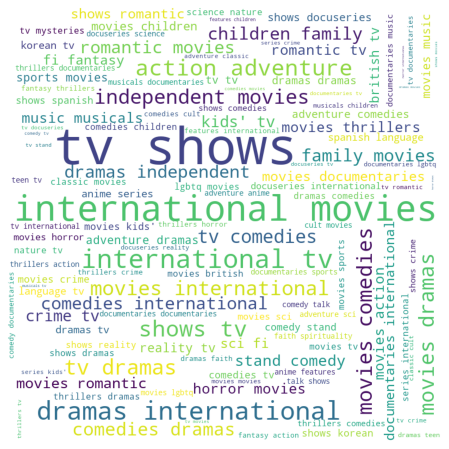

In [ ]:
for j in db['listed_in']:
    tokens=j.split(',')

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    wc =wc+ " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords).generate(wc)
plt.figure(figsize=(20,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
def release(release_date):
    if 1960<=release_date<=1990:
        return 'Very old'
    elif 1990<release_date<=2000:
        return 'Old'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'New'
    else:
        return None
db['Movie_release_type']=db['release_year'].apply(release)

In [ ]:
db.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_release_type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,New
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,New
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Early 21st century
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Early 21st century
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Early 21st century


Movie_release_type  type   
Early 21st century  Movie      1820
                    TV Show     574
New                 Movie      3125
                    TV Show    1785
Old                 Movie       207
                    TV Show      32
Very old            Movie       201
                    TV Show      17
Name: type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


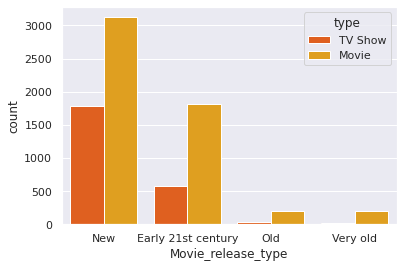

In [ ]:
print(db.groupby('Movie_release_type').type.value_counts())
sns.countplot(db['Movie_release_type'],hue=db['type'],palette='autumn')